In [2]:
%load_ext autoreload
%autoreload 2

import keras
import math
import numpy as np
import seaborn as sb
import tensorflow as tf
from statistics import mean
import matplotlib.pyplot as plt

from Jlayers import SimpleLayer
from utilsSimpleConv2D import*
from SpectralLayer import Spectral
from spectralconvolutions import *
from tensorflow.keras.layers import Dense,Layer
from typing import Tuple,List,Any,Dict
from tensorflow.python.keras import activations, initializers, regularizers, constraints

In [3]:
## Data

In [4]:
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()


x_train, x_test=x_train.reshape(-1,28,28,1), x_test.reshape(-1,28,28,1)

x_train, x_test = x_train / 255.0, x_test / 255.0

flat_train = np.reshape(x_train, [x_train.shape[0], 28 * 28])
flat_test = np.reshape(x_test, [x_test.shape[0], 28 * 28])

In [5]:
## Parametres

In [6]:
spectral_config={
    'is_base_trainable' : False,
    'is_diag_start_trainable' : False,
    'is_diag_end_trainable' : True,
}


In [7]:
## Train only Lambda in

In [8]:
accuracy=list()



parameters_two={"use_lambda_in":True,
            "use_bias":False,
             "padding":'VALID',
            "activation":'relu'
           }

N2=[20,80,100,500,800,1000,1500,2000]
epochs = 10
batch_size=512

for i in range(len(N2)):
    print(f"Iteration {i}: nombre de neurones: {N2[i]}")
    model = tf.keras.Sequential()
    
    
    model.add(tf.keras.layers.Input(shape=(28,28,1)))
    
    
    model.add(SpectralConv2D_two(filters=1, kernel_size=3, strides=3, **parameters_two))
    model.add(keras.layers.MaxPooling2D((2,2)))
    model.add(keras.layers.Dropout(0.2))       
    
    model.add(keras.layers.Flatten())      
    model.add(Spectral(N2[i], **spectral_config,use_bias=False, activation='relu'))
    model.add(keras.layers.Dropout(0.5))
    model.add(Spectral(120, **spectral_config,use_bias=False, activation='relu'))
    model.add(Spectral(10, **spectral_config,use_bias=False, activation='softmax'))

    opt = tf.keras.optimizers.Adam(learning_rate=0.03)
    model.compile(optimizer=opt, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs,verbose=0,validation_data=(x_test, y_test))
    accuracy.append(model.evaluate(x_test,y_test,batch_size=32,verbose="auto"))

Iteration 0: nombre de neurones: 20
313/313 [==============================] - 2s 7ms/step - loss: 1.5312 - accuracy: 0.4802
Iteration 1: nombre de neurones: 80
313/313 [==============================] - 2s 7ms/step - loss: 1.2317 - accuracy: 0.6143
Iteration 2: nombre de neurones: 100
313/313 [==============================] - 2s 7ms/step - loss: 1.1847 - accuracy: 0.6141
Iteration 3: nombre de neurones: 500
313/313 [==============================] - 2s 7ms/step - loss: 0.9721 - accuracy: 0.7356
Iteration 4: nombre de neurones: 800
313/313 [==============================] - 2s 7ms/step - loss: 0.8956 - accuracy: 0.7491
Iteration 5: nombre de neurones: 1000
313/313 [==============================] - 2s 7ms/step - loss: 0.8441 - accuracy: 0.7663
Iteration 6: nombre de neurones: 1500
313/313 [==============================] - 2s 8ms/step - loss: 0.8147 - accuracy: 0.7775
Iteration 7: nombre de neurones: 2000
313/313 [==============================] - 2s 8ms/step - loss: 0.7858 - accuracy

In [9]:
score=list()
for i in range(len(N2)):
    score.append(accuracy[i][1])

In [10]:
## Dense

In [11]:

accuracy2=list()
N2=[20,80,100,500,800,1000,1500,2000]
epochs = 10
batch_size=512

for i in range(len(N2)):
    print(f"Iteration {i}: nombre de neurones: {N2[i]}")
    model2 = tf.keras.Sequential()
    model2.add(tf.keras.layers.Input(shape=(28,28,1)))
    
    
    model2.add(keras.layers.Conv2D(1,(3,3), strides=3,use_bias=False,padding='VALID',activation="relu"))
    model2.add(keras.layers.MaxPooling2D((2,2)))
    model2.add(keras.layers.Dropout(0.2))   
    
    model2.add(keras.layers.Flatten())  
    
    
    model2.add(Dense(N2[i],use_bias=False,activation='relu'))
    model2.add(keras.layers.Dropout(0.5))
    model2.add(Dense(120,use_bias=False,activation='relu'))
    model2.add(Dense(10, use_bias=False, activation='softmax'))
    
               
    opt = tf.keras.optimizers.Adam(learning_rate=0.03)
    model2.compile(optimizer=opt, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    history = model2.fit(x_train, y_train, batch_size=batch_size, epochs=epochs,verbose=0,validation_data=(x_test, y_test))
    accuracy2.append(model2.evaluate(x_test,y_test,batch_size=32,verbose="auto"))

Iteration 0: nombre de neurones: 20
313/313 [==============================] - 1s 2ms/step - loss: 1.5405 - accuracy: 0.5974
Iteration 1: nombre de neurones: 80
313/313 [==============================] - 1s 2ms/step - loss: 1.0327 - accuracy: 0.7219
Iteration 2: nombre de neurones: 100
313/313 [==============================] - 1s 2ms/step - loss: 1.0044 - accuracy: 0.7305
Iteration 3: nombre de neurones: 500
313/313 [==============================] - 1s 2ms/step - loss: 0.8163 - accuracy: 0.7678
Iteration 4: nombre de neurones: 800
313/313 [==============================] - 1s 2ms/step - loss: 0.9896 - accuracy: 0.7291
Iteration 5: nombre de neurones: 1000
313/313 [==============================] - 1s 3ms/step - loss: 0.8405 - accuracy: 0.7389
Iteration 6: nombre de neurones: 1500
313/313 [==============================] - 1s 3ms/step - loss: 0.7878 - accuracy: 0.7558
Iteration 7: nombre de neurones: 2000
313/313 [==============================] - 1s 3ms/step - loss: 1.0761 - accuracy

In [12]:
score2=list()
for i in range(len(N2)):
    score2.append(accuracy2[i][1])

In [13]:
## Plot

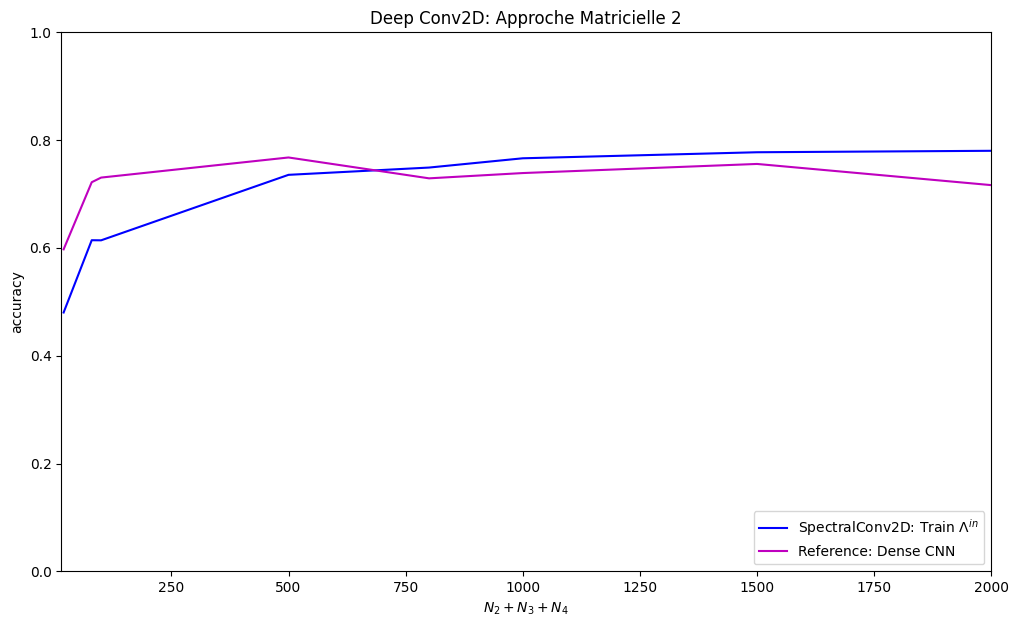

In [14]:
fig=plt.figure(num=1,figsize=(12,7)) 
plt.plot(N2,score, "b-")
plt.plot(N2,score2, "m")

plt.axis([15, 2000, 0, 1])

plt.xlabel("$N_{2}+N_{3}+N_{4}$")
plt.ylabel("accuracy")
plt.title("Deep Conv2D: Approche Matricielle 2")


plt.legend(["SpectralConv2D: Train $\Lambda^{in}$","Reference: Dense CNN "],loc='lower right')

In [15]:
## Seulement 3 pourcent des paramètres entraînés!

In [16]:
## Distribution des poids

In [31]:
distributiob_weights=model.trainable_weights[0].numpy().tolist()[0]

<Axes: ylabel='Count'>

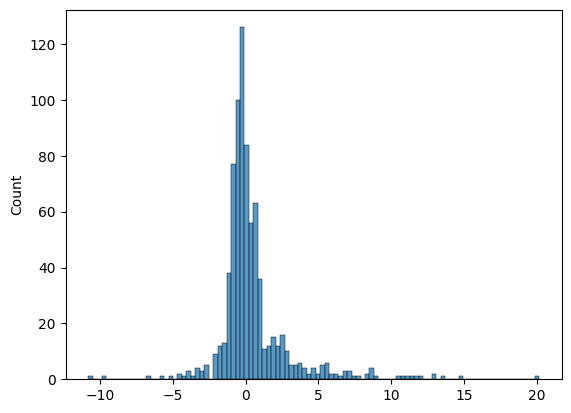

In [32]:
sb.histplot(distributiob_weights,kde=False,log_scale=False, legend=False)

In [33]:
## Distribution Lambda in 